# Pixel Value Collection
We want to take into account the darkness of the figures into account as well. Therefore we calculate the average RGB value of every figure for the experiment.

In [46]:
import pandas as pd
import numpy as np
from PIL import Image
import os

In [47]:
maindir = '/home/wangmk/UM/Research/SURE/ReconCustom/Picture_for_experiment/'

In [48]:
dirnames = os.listdir(maindir)

In [49]:
rgbdf = pd.DataFrame(columns=['R','G','B'])

In [84]:
for dirname in dirnames:
    pics = os.listdir(maindir+dirname)
    for pic in pics:
        print(pic)
        pic_fullname = maindir+dirname+'/'+pic
        img_file = Image.open(pic_fullname)
        img = img_file.load()
        [xs,ys] = img_file.size
        rgbsum = np.array([0,0,0])
        for x in range(xs):
            for y in range(ys):
                rgbsum += np.array(img[x,y][0:3])
        rgbdf.loc[pic] = rgbsum/(xs*ys)

OO_9_absent.png
OO_20_absent.png
OO_17_absent.png
OO_19_absent.png
OO_12_absent.png
OO_8_absent.png
OO_6_absent.png
OO_13_absent.png
OO_10_absent.png
OO_15_absent.png
OO_7_absent.png
OO_4_absent.png
OO_11_absent.png
OO_5_absent.png
OO_2_absent.png
OO_16_absent.png
OO_14_absent.png
OO_3_absent.png
OO_1_absent.png
OO_18_absent.png
PP_5_absent.png
PP_12_absent.png
PP_13_absent.png
PP_2_absent.png
PP_7_absent.png
PP_14_absent.png
PP_6_absent.png
PP_11_absent.png
PP_19_absent.png
PP_3_absent.png
PP_4_absent.png
PP_9_absent.png
PP_16_absent.png
PP_18_absent.png
PP_20_absent.png
PP_10_absent.png
PP_8_absent.png
PP_17_absent.png
PP_15_absent.png
PP_1_absent.png
FF_1_absent.png
FF_2_absent.png
FF_4_absent.png
FF_20_absent.png
FF_3_absent.png
FF_19_absent.png
FF_18_absent.png
FF_17_absent.png
FF_10_absent.png
FF_5_absent.png
FF_16_absent.png
FF_9_absent.png
FF_13_absent.png
FF_15_absent.png
FF_12_absent.png
FF_11_absent.png
FF_14_absent.png
FF_6_absent.png
FF_8_absent.png
FF_7_absent.png
HH_14_a

JJ_15_absent.png
JJ_20_absent.png
JJ_14_absent.png
JJ_18_absent.png
JJ_1_absent.png
JJ_10_absent.png
JJ_6_absent.png
JJ_9_absent.png
JJ_17_absent.png
JJ_12_absent.png
JJ_5_absent.png
JJ_13_absent.png
JJ_2_absent.png
JJ_8_absent.png
JJ_16_absent.png
JJ_3_absent.png
PP_14_absentflip.png
PP_3_absentflip.png
PP_16_absentflip.png
PP_12_absentflip.png
PP_19_absentflip.png
PP_17_absentflip.png
PP_11_absentflip.png
PP_1_absentflip.png
PP_4_absentflip.png
PP_13_absentflip.png
PP_18_absentflip.png
PP_10_absentflip.png
PP_2_absentflip.png
PP_5_absentflip.png
PP_8_absentflip.png
PP_15_absentflip.png
PP_7_absentflip.png
PP_9_absentflip.png
PP_6_absentflip.png
PP_20_absentflip.png
II_5_absent.png
II_1_absent.png
II_18_absent.png
II_3_absent.png
II_20_absent.png
II_7_absent.png
II_2_absent.png
II_13_absent.png
II_12_absent.png
II_4_absent.png
II_10_absent.png
II_16_absent.png
II_8_absent.png
II_14_absent.png
II_11_absent.png
II_17_absent.png
II_9_absent.png
II_15_absent.png
II_19_absent.png
II_6_abse

In [88]:
rgbdf.to_csv("/home/wangmk/UM/Research/SURE/cleaned_data/RGB.csv")

# Picture Clustering
CLuster pictures into dark and bright ones based on the pixel values we have got..

In [7]:
import pandas as pd
import numpy as np
from colorutils import Color
from sklearn.cluster import KMeans

In [17]:
import seaborn as sns

In [18]:
import matplotlib.pyplot as plt

In [2]:
rgbdf = pd.read_csv("/home/wangmk/UM/Research/SURE/cleaned_data/RGB.csv",index_col=0)

In [12]:
picnames = rgbdf.index.values

In [54]:
hsvdf = pd.DataFrame(columns = ['V'])

In [55]:
for dirname in dirnames:
    pics = os.listdir(maindir+dirname)
    for pic in pics:
        print(pic)
        pic_fullname = maindir+dirname+'/'+pic
        img_file = Image.open(pic_fullname)
        img = img_file.load()
        [xs,ys] = img_file.size
        vsum = 0
        for x in range(xs):
            for y in range(ys):
                c = Color(tuple(img[x,y]))
                vsum += float(c.hsv[2])
        hsvdf.loc[pic] = vsum/(xs*ys)

OO_9_absent.png
OO_20_absent.png
OO_17_absent.png
OO_19_absent.png
OO_12_absent.png
OO_8_absent.png
OO_6_absent.png
OO_13_absent.png
OO_10_absent.png
OO_15_absent.png
OO_7_absent.png
OO_4_absent.png
OO_11_absent.png
OO_5_absent.png
OO_2_absent.png
OO_16_absent.png
OO_14_absent.png
OO_3_absent.png
OO_1_absent.png
OO_18_absent.png
PP_5_absent.png
PP_12_absent.png
PP_13_absent.png
PP_2_absent.png
PP_7_absent.png
PP_14_absent.png
PP_6_absent.png
PP_11_absent.png
PP_19_absent.png
PP_3_absent.png
PP_4_absent.png
PP_9_absent.png
PP_16_absent.png
PP_18_absent.png
PP_20_absent.png
PP_10_absent.png
PP_8_absent.png
PP_17_absent.png
PP_15_absent.png
PP_1_absent.png
FF_1_absent.png
FF_2_absent.png
FF_4_absent.png
FF_20_absent.png
FF_3_absent.png
FF_19_absent.png
FF_18_absent.png
FF_17_absent.png
FF_10_absent.png
FF_5_absent.png
FF_16_absent.png
FF_9_absent.png
FF_13_absent.png
FF_15_absent.png
FF_12_absent.png
FF_11_absent.png
FF_14_absent.png
FF_6_absent.png
FF_8_absent.png
FF_7_absent.png
HH_14_a

JJ_15_absent.png
JJ_20_absent.png
JJ_14_absent.png
JJ_18_absent.png
JJ_1_absent.png
JJ_10_absent.png
JJ_6_absent.png
JJ_9_absent.png
JJ_17_absent.png
JJ_12_absent.png
JJ_5_absent.png
JJ_13_absent.png
JJ_2_absent.png
JJ_8_absent.png
JJ_16_absent.png
JJ_3_absent.png
PP_14_absentflip.png
PP_3_absentflip.png
PP_16_absentflip.png
PP_12_absentflip.png
PP_19_absentflip.png
PP_17_absentflip.png
PP_11_absentflip.png
PP_1_absentflip.png
PP_4_absentflip.png
PP_13_absentflip.png
PP_18_absentflip.png
PP_10_absentflip.png
PP_2_absentflip.png
PP_5_absentflip.png
PP_8_absentflip.png
PP_15_absentflip.png
PP_7_absentflip.png
PP_9_absentflip.png
PP_6_absentflip.png
PP_20_absentflip.png
II_5_absent.png
II_1_absent.png
II_18_absent.png
II_3_absent.png
II_20_absent.png
II_7_absent.png
II_2_absent.png
II_13_absent.png
II_12_absent.png
II_4_absent.png
II_10_absent.png
II_16_absent.png
II_8_absent.png
II_14_absent.png
II_11_absent.png
II_17_absent.png
II_9_absent.png
II_15_absent.png
II_19_absent.png
II_6_abse

In [56]:
hsvdf.head()

,V
OO_9_absent.png,0.257130
OO_20_absent.png,0.240949
OO_17_absent.png,0.065501
OO_19_absent.png,0.187799
OO_12_absent.png,0.273494


In [29]:
hsvdf = hsvdf.astype(float)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f64550fa668>]],
      dtype=object)

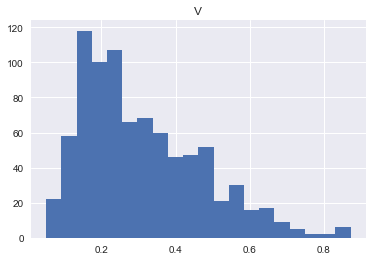

In [57]:
hsvdf.hist(bins=20)

In [58]:
hsvdf.to_csv("/home/wangmk/UM/Research/SURE/cleaned_data/HSV_1.csv")

In [11]:
rgbdf.corr()

,R,G,B
R,1.000000,0.982317,0.890817
G,0.982317,1.000000,0.941619
B,0.890817,0.941619,1.000000


In [3]:
rgbdf.head()

,R,G,B
OO_9_absent.png,61.399614,62.373057,60.786480
OO_20_absent.png,57.225685,58.922975,60.769389
OO_17_absent.png,16.440120,14.452102,12.232191
OO_19_absent.png,43.077547,44.188059,46.495392
OO_12_absent.png,67.352569,62.806281,64.548316


In [5]:
rgb_array = np.array(rgbdf)

In [59]:
hsv_array = np.array(hsvdf['V'])

In [60]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(hsv_array.reshape(-1,1))
labels = kmeans.predict(hsv_array.reshape(-1,1))

In [61]:
np.sum(labels)

283

In [62]:
len(labels)-np.sum(labels)

569

In [63]:
pairs = dict(zip(picnames,labels))

In [64]:
import pickle

In [65]:
with open("/home/wangmk/UM/Research/SURE/cleaned_data/pic_brightness_1.pkl",'wb+') as f:
    pickle.dump([pairs],f)

In [70]:
with open("/home/wangmk/UM/Research/SURE/cleaned_data/pic_brightness_1.pkl",'rb') as f:
    darkness1 = pickle.load(f)[0]

In [68]:
with open("/home/wangmk/UM/Research/SURE/cleaned_data/pic_brightness.pkl",'rb') as f:
    darkness2 = pickle.load(f)[0]

In [72]:
darkness2['SS_17_present.png']

1

In [73]:
diff = []

In [74]:
for picname in picnames:
    if darkness1[picname]!=darkness2[picname]:
        diff.append(picname)

In [97]:
darkness2['EE_20_absent.png']

1

In [96]:
darkness1['TT_13_absent.png']

0

In [77]:
diff

['PP_20_absent.png',
 'FF_12_absent.png',
 'HH_1_absentflip.png',
 'TT_13_absent.png',
 'TT_14_absent.png',
 'AA_17_absentflip.png',
 'AA_17_absent.png',
 'LL_10_absent.png',
 'LL_19_absent.png',
 'LL_15_absent.png',
 'PP_20_absentflip.png',
 'KK_2_absent.png',
 'KK_1_absent.png',
 'KK_1_absentflip.png',
 'KK_2_absentflip.png',
 'HH_1_absent.png',
 'TT_16_present.png',
 'TT_13_absentflip.png',
 'TT_14_absentflip.png',
 'FF_12_absentflip.png',
 'LL_15_absentflip.png',
 'LL_10_absentflip.png',
 'LL_19_absentflip.png']